In [198]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Optional but useful
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [199]:
# Load clean datasets
df_clean = pd.read_csv('../data/processed/anime_clean.csv', index_col=0)
df_movies = pd.read_csv('../data/processed/anime_movies.csv', index_col=0)
df_series = pd.read_csv('../data/processed/anime_series.csv', index_col=0)

# Ensure date columns are datetime
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_series['release_date'] = pd.to_datetime(df_series['release_date'])

print(f"Clean dataset: {df_clean.shape}")
print(f"Movies: {df_movies.shape}")
print(f"Series: {df_series.shape}")

Clean dataset: (2460, 9)
Movies: (448, 9)
Series: (2009, 9)


In [200]:
df_clean.head()

,title,genre,studio,number_of_episodes,release_date,content_type,viewer_reviews,source,year
0,Attack on Titan,"Action, Drama, Fantasy, Mystery",WIT STUDIO,25,2013-04-01,Tv,84.0,AniList,2013.0
1,Demon Slayer: Kimetsu no Yaiba,"Action, Adventure, Drama, Fantasy, Supernatural",ufotable,26,2019-04-01,Tv,82.0,AniList,2019.0
2,Death Note,"Mystery, Psychological, Supernatural, Thriller",MADHOUSE,37,2006-10-01,Tv,84.0,AniList,2006.0
3,JUJUTSU KAISEN,"Action, Drama, Supernatural",Toho,24,2020-10-01,Tv,85.0,AniList,2020.0
4,My Hero Academia,"Action, Adventure, Comedy",bones,13,2016-04-01,Tv,76.0,AniList,2016.0


In [201]:
df_clean.groupby('content_type')['viewer_reviews'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
content_type,,,,,,,,
Movie,310.0,75.30,6.19,52.0,71.00,76.0,80.00,91.0
Music,2.0,83.00,4.24,80.0,81.50,83.0,84.50,86.0
Ona,127.0,72.46,7.02,52.0,68.00,73.0,77.00,86.0
Ova,180.0,72.12,6.62,33.0,69.00,72.5,76.00,88.0
Special,62.0,73.21,6.93,49.0,70.00,73.0,77.75,90.0
Tv,1723.0,71.47,7.94,21.0,66.00,72.0,77.00,91.0
Tv Short,56.0,63.82,10.26,27.0,60.75,65.5,71.00,83.0


In [202]:
mean_score = df_clean['viewer_reviews'].mean().round(2)
median_score = df_clean['viewer_reviews'].median().round(2)
std_score = df_clean['viewer_reviews'].std().round(2)

good_reviews = (df_clean['viewer_reviews'] > 50).sum()
total_reviews = len(df_clean)
percentage_good = ((good_reviews / total_reviews) * 100).round(1)

print(f"📊 ANIME REVIEWS SUMMARY:")
print(f"   Mean score: {mean_score}")
print(f"   Median score: {median_score}")
print(f"   Standard deviation: {std_score}")
print(f"   Percentage of good reviews (>50): {percentage_good}%")

if percentage_good > 50:
    print(f"✅ The majority ({percentage_good}%) of reviews are good!")
else:
    print(f"❌ The majority ({100-percentage_good}%) of reviews are poor!")

📊 ANIME REVIEWS SUMMARY:
   Mean score: 71.93
   Median score: 72.0
   Standard deviation: 7.84
   Percentage of good reviews (>50): 98.9%
✅ The majority (98.9%) of reviews are good!


<function matplotlib.pyplot.show(close=None, block=None)>

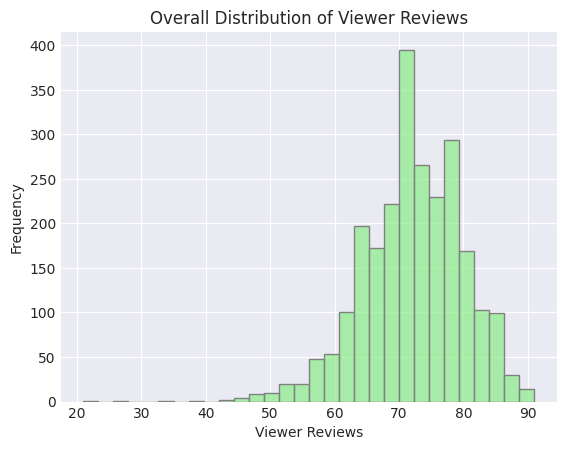

In [203]:
plt.Figure(figsize=(10,5))
sns.histplot(df_clean['viewer_reviews'], bins= 30, color='lightgreen', edgecolor='gray')
plt.title('Overall Distribution of Viewer Reviews')
plt.xlabel('Viewer Reviews')
plt.ylabel('Frequency')
plt.show

📊 CONTENT TYPE DISTRIBUTION:
Most common type: Tv (1723 anime)
Anime is distributed in many ways, being the Tv format the most popular with 70.0% of all anime

🏆 TOP 3 CONTENT TYPES:
   1. Tv: 1723 (70.0%)
   2. Movie: 310 (12.6%)
   3. Ova: 180 (7.3%)


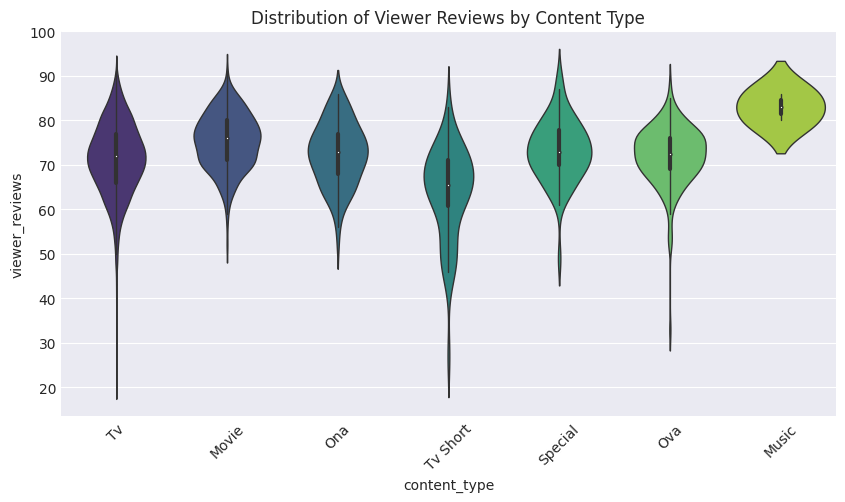

In [204]:
#Univariate Analysis
# Distribution by content type
df_content = df_clean['content_type'].value_counts()
most_common_type = df_content.index[0]
most_common_count = df_content.iloc[0]
total_anime = len(df_clean)
percentage = (most_common_count / total_anime * 100).round(1)

print(f"📊 CONTENT TYPE DISTRIBUTION:")
print(f"Most common type: {most_common_type} ({most_common_count} anime)")
print(f"Anime is distributed in many ways, being the {most_common_type} format the most popular with {percentage}% of all anime")

# Top 3
print(f"\n🏆 TOP 3 CONTENT TYPES:")
for i in range(min(3, len(df_content))):
    type_name = df_content.index[i]
    count = df_content.iloc[i]
    pct = (count / total_anime * 100).round(1)
    print(f"   {i+1}. {type_name}: {count} ({pct}%)")
    
# - Distribution of ratings by content type


# -
plt.figure(figsize=(10, 5))
sns.violinplot(data=df_clean, x="content_type", y="viewer_reviews", palette="viridis", linewidth=1)
sns.color_palette("mako", as_cmap=True)
plt.xticks(rotation=45)
plt.title('Distribution of Viewer Reviews by Content Type')
plt.show()

# - Top studios by production volume
# - Episode count patterns
# - Genre popularity

In [205]:
df_clean.groupby(['studio'])['studio'].count()


studio
8-bit             29
A-1 Pictures      74
A.C.G.T.           1
ADV Films          2
AIC               11
                  ..
production doA     1
project No.9      16
studio A-CAT       3
studio MOTHER      2
ufotable          25
Name: studio, Length: 270, dtype: int64